## DS-UA 301 Assignment 4

Welcome! The purpose of this notebook is to give you hands-on practice with implementing and training RL agents that learn policies from experience.

Dependencies: 
+ gym

Installation instructions: https://gym.openai.com/docs/#installation

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import random

LOCAL_PATH = os.getcwd()
print(os.listdir(LOCAL_PATH))
sys.path.append(LOCAL_PATH)
sys.path.append(LOCAL_PATH + '/lib')
import gym
from assignment4 import *

import numpy as np

['.DS_Store', '.ipynb_checkpoints', 'A4.ipynb', 'lib']


## 1. Set up environment (15 points)

A good testbed for RL agents can be found at [OpenAI Gym](https://gym.openai.com/docs/). Gym provides a diverse [collection](https://gym.openai.com/docs/#available-environments) of environments with a common interface designed to make it easy to train agents. Gym users can select one of the pre-made environments, or write their own. In this assigment, we will work with the "Cliff Walking" environment from Sutton and Barto 6.6. The assignment library contains a custom function for implementing this environment in Gym.

Run the cell below to instantiate and visualize your environment.

In [3]:
env = CliffEnv()
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  T


What do the "x", "T" and "o" mean in this visualization?

The 'X' is where the agent begins, 'O' are the available states for the agent to be in, and 'T' is the terminal state. The example in the book denotes the O's between x and T to be the actual cliff, where if the agent steps on those middle states, they will incur a rweard of -100

You can check the current state by running the following command: 

In [4]:
env.S

(3, 0)

Now that we know what the envrionment looks like, let's check to make sure that the MDP is set up correctly. Run the next cell to see the attributes and methods available in the environment class.   

In [5]:
dir(env)

['S',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'action_space',
 'close',
 'height',
 'metadata',
 'moves',
 'observation_space',
 'render',
 'reset',
 'reward_range',
 'seed',
 'spec',
 'step',
 'unwrapped',
 'width']

A note about terminology: Gym uses the term *observation space* instead of *state space* because it models the environment as a Partially-Observable Markov Decision Process (POMDP). We will talk in detail about the POMDP framework in a couple of lectures, but in short, POMDPs are an extension of MDPs in which the agent does not get full information about the *state* -- it only gets raw *observations*. For the problem we are studying here, the *state space* and *observation space* are the same. 

In the cell below, run a command that checks the observation space of the environment. 

In [6]:
env.observation_space

Tuple(Discrete(4), Discrete(12))

Describe below what the output means.

This tuple represents the dimensions of our gridworld, a 4x12 gridworld with discrete values (an agent either is or isn't inside a state at any given moment)

Next, run a command that checks the action space of the environment. 

In [7]:
env.action_space

Discrete(4)

Describe below what the output means.

Much like observation space, this means that there are four (4) distinct actions available to an agent, discrete actions too. I am guessing you have the options to move up, left, down, or right in any given space. They are discrete because you either do or don't take an action. 

The logic of how the environment changes in response to an agent's action is specified in the environment's ``step`` method, found in the assignment library. Examine the ``step`` method. What sequence of actions would the agent need to take to move up twice, right three times and down once? 

0: up

1: right

2: down

3: left

In [8]:
env.S
env.step(0)
env.step(0)
env.step(1)
env.step(1)
env.step(1)
env.step(2)

((2, 3), -1, False, {})

Lastly, let's check how rewards are set up. Copy below the line from the library that you would have to change in order to modify the penalty the agent incurs when reaching the cliff.   

In [9]:
'''
elif self.S[1] != 0 and self.S[0] == self.height - 1:
            return self.reset(), -100, False, {}
'''

'\nelif self.S[1] != 0 and self.S[0] == self.height - 1:\n            return self.reset(), -100, False, {}\n'

## 2. Simulate behavior from random agent (15 points)

The code below shows how you can use the step function to simulate behavior from a random agent. To do this, we have to create two loops: an outer loop that goes through different episodes; and an inner loop that, for each episode, steps through the environment based on the agent's current policy. Run the cell below for 200 episodes and 1000 steps per episode. 

In [10]:
n_episodes = 200 
n_max_timesteps = 1000
visualize_env = False
print_output = False

R_random_agent = [] # for collecting returns
T_ep_length = []
P_pen_count = []
for i_episode in range(n_episodes):
    
    if print_output: 
        print('Episode: ' + str(i_episode+1))
    
    # Reset environment at the beginning of each episode. 
    observation = env.reset()
    done = False
    
    t = 0 # timestep counter
    penalties, ep_return = 0, 0 # cliff penalty and return counters
    
    # Loop through time steps. 
    while not done:
        
        if print_output:
            print('Timestep: ' + str(t+1))
        
        # Visualize state of the environment. 
        if visualize_env:
            env.render()
            print('\n ')
        
        # Pick a random action. 
        action = env.action_space.sample()
        
        if (action == 0): a = 'up';
        elif (action == 1): a = 'right';
        elif (action == 2): a = 'down';
        elif (action == 3): a = 'left';
        
        if print_output:
            print('Action: ' + a)
        
        # Step through and observe new state and reward. 
        observation, reward, done, info = env.step(action)
        
        # Update counters.
        
        ep_return += reward
        if reward == -100:
            penalties += 1
        t += 1
        
        if print_output:
            print('Reward: ' + str(reward))
        
        # Break the loop if we haven't finished the episode in the 
        # max amount of time. 
        if t == n_max_timesteps:
            done = True
        
        # Check if we reached the terminal state. 
        if done:
            R_random_agent.append(ep_return)
            break

    print("Timesteps taken: {}".format(t))
    T_ep_length.append(t)
    print("Penalties incurred: {}".format(penalties))
    P_pen_count.append(penalties)
    print("Episode return: {}".format(ep_return))

env.close()

Timesteps taken: 1000
Penalties incurred: 103
Episode return: -11197
Timesteps taken: 525
Penalties incurred: 33
Episode return: -3792
Timesteps taken: 1000
Penalties incurred: 90
Episode return: -9910
Timesteps taken: 1000
Penalties incurred: 93
Episode return: -10207
Timesteps taken: 1000
Penalties incurred: 78
Episode return: -8722
Timesteps taken: 1000
Penalties incurred: 99
Episode return: -10801
Timesteps taken: 1000
Penalties incurred: 86
Episode return: -9514
Timesteps taken: 1000
Penalties incurred: 81
Episode return: -9019
Timesteps taken: 1000
Penalties incurred: 95
Episode return: -10405
Timesteps taken: 367
Penalties incurred: 23
Episode return: -2644
Timesteps taken: 1000
Penalties incurred: 105
Episode return: -11395
Timesteps taken: 47
Penalties incurred: 2
Episode return: -245
Timesteps taken: 1000
Penalties incurred: 74
Episode return: -8326
Timesteps taken: 1000
Penalties incurred: 86
Episode return: -9514
Timesteps taken: 1000
Penalties incurred: 88
Episode return: 

Let's check how well the agent did. To do this, we can plot the return (sum of rewards) for each episode. Run the cell below to get that. 

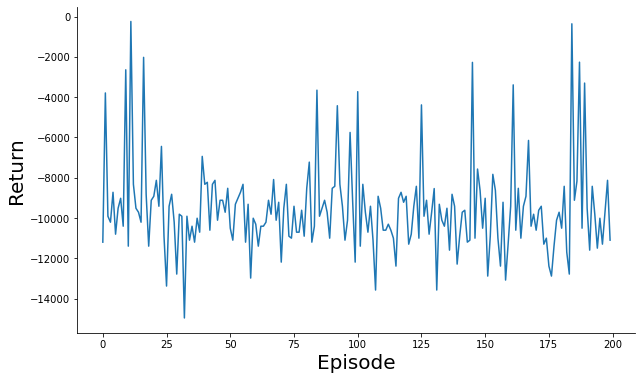

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.plot(R_random_agent);
ax.set_xlabel('Episode', fontsize=20)
ax.set_ylabel('Return', fontsize=20)
sns.despine()

Describe what the plot above is showing. Has the agent improved its policy with experience? Why or why not?

The agent hasn't improved its policy with experience. Perhaps because there is really no way the agent is improving upon its policy, no mechanism to record previous choices to avoid and which ones to choose.

Modify the code above to collect all the episode lengths. Plot a histogram of that quantity below. 

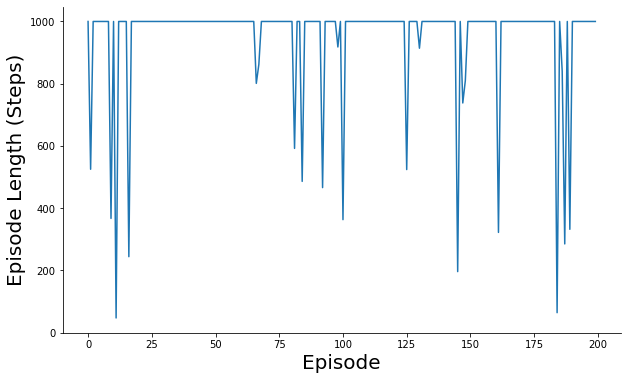

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.plot(T_ep_length)
ax.set_xlabel('Episode', fontsize=20)
ax.set_ylabel('Episode Length (Steps)', fontsize=20)
sns.despine()

Modify the code above to collect the number of penalties incurred for each episode (that is, how many times the agent went to the cliff).
Plot a histogram of that quantity below. 

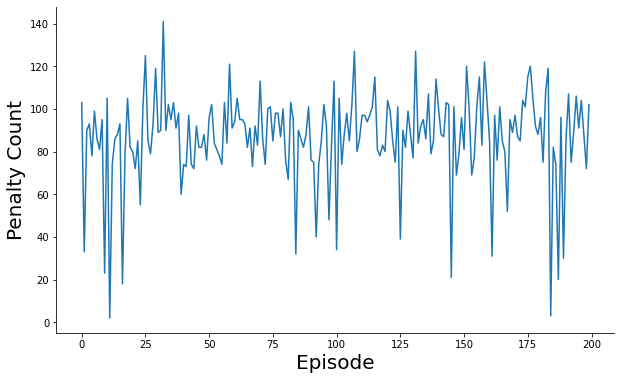

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.plot(P_pen_count)
ax.set_xlabel('Episode', fontsize=20)
ax.set_ylabel('Penalty Count', fontsize=20)
sns.despine()

## 3. Train a Q-Learning agent (20 points)

Next we will implement an agent that learns to update its policy from experience using Q-Learning. Q-Learning maintains a table of Q-Values which gets updated after each expreience. 

A standard way to represent the Q-Table is as an array in which we have a row for every state, and a column for every action. 

In our case, the state representation is 2D (that is, the state consists of the x and y position in the grid). To make indexing easier, we can represent the Q-Table as an array of dimensionality ``(n_actions, height, width)``. The first dimension of this array corresponds to the action, the second dimension to the x-position in the grid, and the third dimension to the y-position in the grid. So ``Q(2, 3, 0)`` would give us the Q-Value of taking ``action 2`` (down) in ``state (3,0)``.

Using the attributes of the environment (i.e. ``env.moves``, ``env.width``, ``env.height``), initialize the Q-Table below such that all the Q-Values are zero:  

In [14]:
def create_Q(moves=env.moves, width=env.width, height=env.height):
    return np.zeros((len(moves), height, width))
q = create_Q()

The agent uses the Q-Values to decide what action to take. Q-Learning agents typically use an $\epsilon$-greedy policy, in which the agent is greedy over actions in a state with probability $1-\epsilon$ and explores a random action with probability $\epsilon$. In the cell below, initialize an $\epsilon$ variable between 0 and 1, and implement $\epsilon$-greedy. Your implementation should return one of the possible actions.    

In [15]:
def eGreedy(table, state, epsilon=0.1):      
    if np.random.random() < epsilon:
        action = np.random.choice(4)
    else:
        posY , posX = state
        state_qValues = [table[i][posY][posX] for i in env.moves]
        max_index = state_qValues.index(max(state_qValues))
        action = max_index
    return action

We will now implement the update rule for a Q-Learning agent:  

$$ Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \max_aQ(S_{t+1}, a) - Q(S_t, A_t)] $$

First, initialize the step size $\alpha$ and discounting factor $\gamma$ to some values you would like to test:  

In [16]:
gamma = 0.9
alpha = 0.5

Second, use the environment's ``step`` function with the action as input to obtain the next state and the reward. 

In [17]:
def step(action):
    return env.step(action)

Finally, write out the update. Hint: to make the code more readable, you may want to first create some intermediary variables, e.g. for the old value of $Q(S_t, A_t)$, the largest Q-Value in the next state $\max_aQ(S_{t+1}, a)$, and the updated value of $Q(S_t, A_t)$.

In [18]:
def update_qTable(q_table, state, action, reward, next_state_value, gamma_discount = 0.9, alpha = 0.5):
    posY , posX = state
    cur_q_value = q_table[action][posY][posX]
    # UPDATE TAKES PLACE WITHIN THE FUNCTION, RETURN DOESN'T ACTUALLY HAVE ANY FUNCTIONALITY
    q_table[action][posY][posX] = cur_q_value + alpha * (reward + (gamma_discount * next_state_value) - cur_q_value)
    return q_table    

And now to put it all together... In the cell below, fill in all the missing code bits. Notice how this code block has the same structure as the one used for simulating behavior from the random agent. The only difference is that we are allowing the agent to *learn* from experience by updating Q-Values.

In [19]:
## Q-Learning training function. 

n_episodes = 200 
n_max_timesteps = 1000
visualize_env = False
print_output = False

##################################### 
### PARAMETER INITIALIZATION HERE ### 
alpha = 0.5
epsilon = 0.1
gamma = 0.9
#####################################

################################### 
### Q-TABLE INITIALIZATION HERE ### 
table = create_Q()
################################### 

R_q_agent = [] # for collecting returns
T_q_agent = []
P_q_agent = []
for i_episode in range(n_episodes):
    
    if print_output: 
        print('Episode: ' + str(i_episode+1))
    
    # Reset environment at the beginning of each episode. 
    observation = env.reset()
    
    done = False
    
    t = 0 # timestep counter
    penalties, ep_return = 0, 0 # cliff penalty and return counters
    
    # Loop through time steps. 
    while not done:
        
        if print_output:
            print('Timestep: ' + str(t+1))
        
        # Visualize state of the environment. 
        if visualize_env:
            env.render()
            print('\n ')
        
        # Pick an action. 
        ############################ 
        action = eGreedy(table, env.S)
        cur_state = env.S
        ############################ 
        
        if (action == 0): a = 'up';
        elif (action == 1): a = 'right';
        elif (action == 2): a = 'down';
        elif (action == 3): a = 'left';
        
        if print_output:
            print('Action: ' + a)
        
        # Step through and observe new state and reward. 
        ##########################
        observation, reward, done, info = step(action)
        posY, posX = observation
        maximum_state_value  = np.amax([table[i][posY][posX] for i in env.moves])
        ##########################
        
        ###########################
        update_qTable(table, cur_state, action, reward, maximum_state_value, gamma, alpha)
        ###########################
    
        # Update counters.
        ep_return += reward
        if reward == -100:
            penalties += 1
        t += 1
        
        if print_output:
            print('Reward: ' + str(reward))
        
        # Break the loop if we haven't finished the episode in the 
        # max amount of time. 
        if t == n_max_timesteps:
            done = True
        
        # Check if we reached the terminal state. 
        if done:
            R_q_agent.append(ep_return)
            break

    print("Timesteps taken: {}".format(t))
    print("Penalties incurred: {}".format(penalties))
    print("Episode return: {}".format(ep_return))
    T_q_agent.append(t)
    P_q_agent.append(penalties)

env.close()

Timesteps taken: 173
Penalties incurred: 2
Episode return: -371
Timesteps taken: 474
Penalties incurred: 12
Episode return: -1662
Timesteps taken: 57
Penalties incurred: 0
Episode return: -57
Timesteps taken: 168
Penalties incurred: 2
Episode return: -366
Timesteps taken: 52
Penalties incurred: 0
Episode return: -52
Timesteps taken: 123
Penalties incurred: 2
Episode return: -321
Timesteps taken: 43
Penalties incurred: 0
Episode return: -43
Timesteps taken: 54
Penalties incurred: 0
Episode return: -54
Timesteps taken: 70
Penalties incurred: 0
Episode return: -70
Timesteps taken: 54
Penalties incurred: 0
Episode return: -54
Timesteps taken: 33
Penalties incurred: 0
Episode return: -33
Timesteps taken: 43
Penalties incurred: 0
Episode return: -43
Timesteps taken: 53
Penalties incurred: 0
Episode return: -53
Timesteps taken: 69
Penalties incurred: 1
Episode return: -168
Timesteps taken: 32
Penalties incurred: 0
Episode return: -32
Timesteps taken: 54
Penalties incurred: 0
Episode return: -

Let's see if this improves on the random policy. Run the code below to plot a comparison of the return for the Q-Learning vs. the random agent.

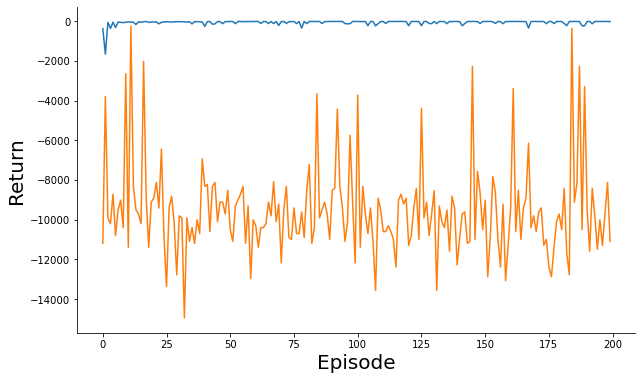

In [20]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(R_q_agent);
ax.plot(R_random_agent);
ax.set_xlabel('Episode', fontsize=20)
ax.set_ylabel('Return', fontsize=20)
sns.despine()

Briefly describe the plot. Has the agent improved its policy with experience? Why or why not? 

Yes! Q-Learning makes the best decisions instead of random ones and we can see that here, where random action choices perform way worse than q-learning. Average returns for the q-learning algorithm is extremely close to 0.

Repeat the comparison for the histogram of episode lengths and number of penalties incurred (you'll need to make an additional set of variables that collect these quantities from the Q-Learning agent). Does Q-Learning improve upon the random policy for both metrics? 

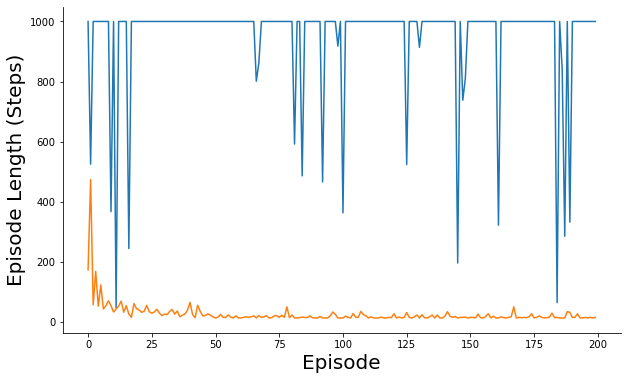

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(T_ep_length);
ax.plot(T_q_agent);
ax.set_xlabel('Episode', fontsize=20)
ax.set_ylabel('Episode Length (Steps)', fontsize=20)
sns.despine()

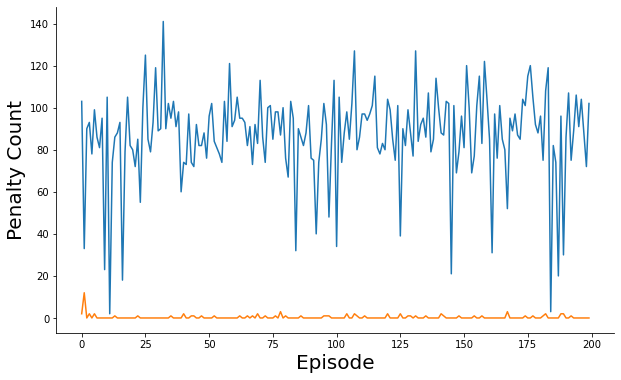

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(P_pen_count);
ax.plot(P_q_agent);
ax.set_xlabel('Episode', fontsize=20)
ax.set_ylabel('Penalty Count', fontsize=20)
sns.despine()

## 4. Simulate behavior from a SARSA agent (10 points)

SARSA is very similar to Q-Learning, except for the way the update works:

$$ Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)] $$

In the cell below, write out the SARSA update in code: 

In [23]:
def update_qTable(q_table, state, action, reward, next_state_value, gamma_discount = 0.9, alpha = 0.5):
    posY , posX = state
    cur_q_value = q_table[action][posY][posX]
    # UPDATE TAKES PLACE WITHIN THE FUNCTION, RETURN DOESN'T ACTUALLY HAVE ANY FUNCTIONALITY
    q_table[action][posY][posX] = cur_q_value + alpha * (reward + (gamma_discount * next_state_value) - cur_q_value)
    return q_table    

There's nothing to change here, it's just the fact that instead of choosing the MAX possible of the next state, with any action, we are choosing the Q-Value of the next state given the action already. It's only a matter of changing next_state_value.

Now modify the Q-Learning training function to train a SARSA agent. Be sure to use separate variables for the Q-Tables and performance metrics of the two agents. 

In [24]:
## SARSA training function. 

n_episodes = 200 
n_max_timesteps = 1000
visualize_env = False
print_output = False

##################################### 
### PARAMETER INITIALIZATION HERE ### 
alpha = 0.5
epsilon = 0.1
gamma = 0.9
#####################################

################################### 
### Q-TABLE INITIALIZATION HERE ### 
table = create_Q()
################################### 

R_sarsa = [] # for collecting returns
T_sarsa = []
P_sarsa = []

for i_episode in range(n_episodes):
    
    if print_output: 
        print('Episode: ' + str(i_episode+1))
    
    # Reset environment at the beginning of each episode. 
    observation = env.reset()
    
    done = False
    
    t = 0 # timestep counter
    penalties, ep_return = 0, 0 # cliff penalty and return counters
    state = env.S
    action = eGreedy(table, state)
    while not done:
        new_state, reward, done, info = step(action)
        new_action = eGreedy(table, new_state)
        y, x = new_state
        new_state_val = table[new_action][y][x]
        update_qTable(table, state, action, reward, new_state_val, gamma, alpha)
        state = new_state
        action = new_action
        if print_output:
            print('Timestep: ' + str(t+1))
        
        if visualize_env:
            env.render()
            print('\n ')
        if (action == 0): a = 'up';
        elif (action == 1): a = 'right';
        elif (action == 2): a = 'down';
        elif (action == 3): a = 'left';
        
        if print_output:
            print('Action: ' + a)
        ep_return += reward
        if reward == -100:
            penalties += 1
        t += 1
        
        if print_output:
            print('Reward: ' + str(reward)) 
        if t == n_max_timesteps:
            done = True
        
        if done:
            R_sarsa.append(ep_return)
            break

    print("Timesteps taken: {}".format(t))
    T_sarsa.append(t)
    P_sarsa.append(penalties)
    print("Penalties incurred: {}".format(penalties))
    print("Episode return: {}".format(ep_return))

env.close()

Timesteps taken: 149
Penalties incurred: 3
Episode return: -446
Timesteps taken: 517
Penalties incurred: 16
Episode return: -2101
Timesteps taken: 229
Penalties incurred: 3
Episode return: -526
Timesteps taken: 81
Penalties incurred: 1
Episode return: -180
Timesteps taken: 74
Penalties incurred: 0
Episode return: -74
Timesteps taken: 55
Penalties incurred: 0
Episode return: -55
Timesteps taken: 77
Penalties incurred: 0
Episode return: -77
Timesteps taken: 45
Penalties incurred: 0
Episode return: -45
Timesteps taken: 53
Penalties incurred: 0
Episode return: -53
Timesteps taken: 67
Penalties incurred: 0
Episode return: -67
Timesteps taken: 61
Penalties incurred: 1
Episode return: -160
Timesteps taken: 57
Penalties incurred: 0
Episode return: -57
Timesteps taken: 72
Penalties incurred: 0
Episode return: -72
Timesteps taken: 55
Penalties incurred: 0
Episode return: -55
Timesteps taken: 35
Penalties incurred: 0
Episode return: -35
Timesteps taken: 44
Penalties incurred: 0
Episode return: -4

Compare the trained SARSA agent to the Q-Learning and random agents. Which of the three algorithms performs best for each of the three metrics (total return as a function of episode, histogram of episode lengths, histogram of incurred penalties)?

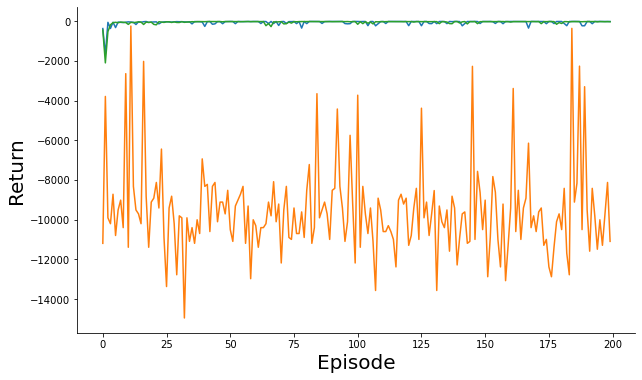

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(R_q_agent);
ax.plot(R_random_agent);
ax.plot(R_sarsa);
ax.set_xlabel('Episode', fontsize=20)
ax.set_ylabel('Return', fontsize=20)
sns.despine()

In [26]:
print('Random return mean:',np.mean(R_random_agent),'\nQ-Learning return mean:',np.mean(R_q_agent),'\nSARSA return mean:', np.mean(R_sarsa))

Random return mean: -9550.59 
Q-Learning return mean: -63.285 
SARSA return mean: -55.595


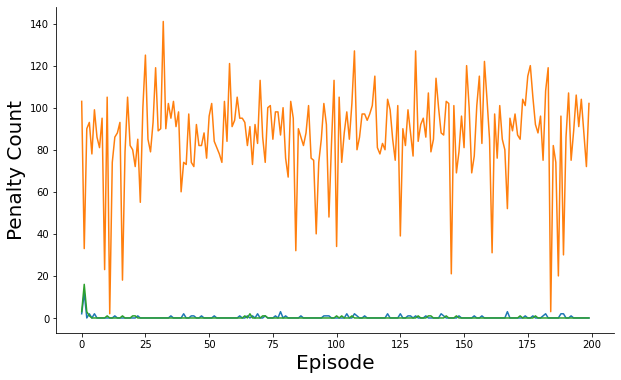

In [27]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(P_q_agent);
ax.plot(P_pen_count);
ax.plot(P_sarsa);
ax.set_xlabel('Episode', fontsize=20)
ax.set_ylabel('Penalty Count', fontsize=20)
sns.despine()

In [28]:
print('Random penalty count mean:',np.mean(P_pen_count),'\nQ-Learning penalty count mean:',np.mean(P_q_agent),'\nSARSA penalty count mean:', np.mean(P_sarsa))

Random penalty count mean: 86.89 
Q-Learning penalty count mean: 0.375 
SARSA penalty count mean: 0.21


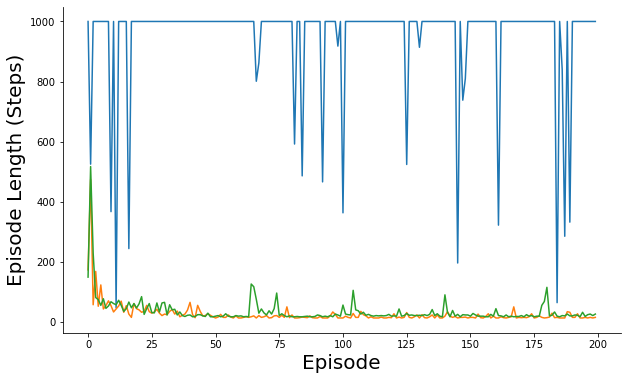

In [29]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(T_ep_length);
ax.plot(T_q_agent);
ax.plot(T_sarsa);
ax.set_xlabel('Episode', fontsize=20)
ax.set_ylabel('Episode Length (Steps)', fontsize=20)
sns.despine()

In [30]:
print('Random episode length mean:',np.mean(T_ep_length),'\nQ-Learning episode length mean:',np.mean(T_q_agent),'\nSARSA episode length mean:', np.mean(T_sarsa))

Random episode length mean: 948.48 
Q-Learning episode length mean: 26.16 
SARSA episode length mean: 34.805


Both Q-Learning and SARSA are examples of *model-free* control algorithms. Name a third algorithm that falls in this category. What makes this third algorithm different? Briefly describe what modifications you would need to make to the training function in order to implement this third algorithm.  

Actor-Critic algorithms would be another example of model-free control algorithms. The difference is that there are no Q-Values involved, meaning a separation between policy and value function. An actor takes actions and the critic serves as the estimate value of that action, and along the way learn how criticize the actor (positive or negative)